In [1]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('juego-azar.csv', sep=';')
df.columns

Index(['bola', 'color', 'numero'], dtype='object')

In [3]:
df.head()

,bola,color,numero
0,1,blanco,1
1,2,negro,1
2,3,negro,1
3,4,negro,1
4,5,blanco,2


In [7]:
df.numero.value_counts()/len(df)

1    0.4
3    0.3
2    0.3
Name: numero, dtype: float64

In [10]:
df.color.value_counts(len(df))

negro     0.6
blanco    0.4
Name: color, dtype: float64

In [18]:
df.groupby(['numero', 'color']).size()

numero  color 
1       blanco    1
        negro     3
2       blanco    1
        negro     2
3       blanco    2
        negro     1
dtype: int64

In [14]:
# P(A|B) = P(B|2) = 1/3+
1/3

0.3333333333333333

# Sección 8


0.9999999999999762

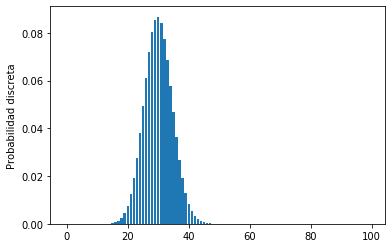

In [54]:
from scipy.stats import binom

p = 0.3
n = 100
x = list(range(0,n,1))
y = []

for i in x:
    y.append(binom.pmf(i, p=p, n=n))

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')

np.sum(y)

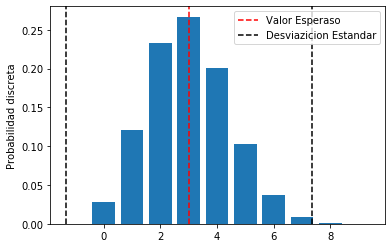

In [59]:
# calculo de la distribucionse
p = 0.3
n = 10
x = list(range(0,n,1))
y = []

for i in x:
    y.append(binom.pmf(i, p=p, n=n))

# Sacar valorese centrales
media = np.average(x, weights = y)
varianza = np.average( (x - media)**2,  weights = y)


# Graficar
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')
ax.axvline(x=media, c = 'r', linestyle = '--', label='Valor Esperaso')
ax.axvline(x = media + 3*np.sqrt(varianza), c = 'k', linestyle= '--', label='Desviazicion Estandar')
ax.axvline(x = media - 3*np.sqrt(varianza), c = 'k', linestyle= '--')
ax.legend()

Text(0.5, 1.0, 'Probabilidad Acomulada')

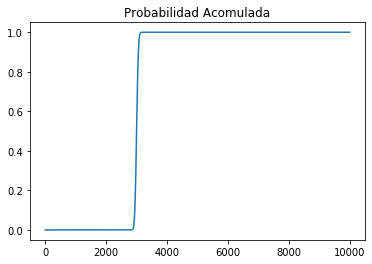

In [73]:
N = 10000
x = list(range(0,N+1,1))
y = [binom.cdf(i, p=0.3, n = N) for i in x]

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Probabilidad Acomulada')


In [78]:
from scipy.stats import norm
mean, var, skew, kurt = norm.stats(moments = 'mvsk')
print(f'media = {mean}')
print(f'Varianza = {var}')
print(f'skew = {skew}')
print(f'kurt = {kurt}')

media = 0.0
Varianza = 1.0
skew = 0.0
kurt = 0.0


# Distribuciones discretas de mayor aplicación

## Bernoulli

In [80]:
from scipy.stats import bernoulli
p = 0.3
data = bernoulli.rvs(p, size=100)
len(data)

100

In [81]:
mean, var, skew, kurt =  bernoulli.stats(p, moments='mvsk')
mean, var, skew, kurt

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

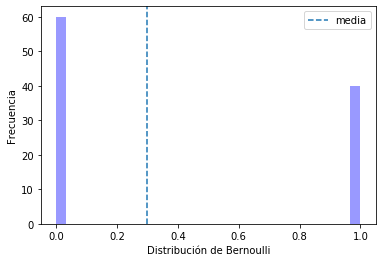

In [90]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribución de Bernoulli', ylabel='Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'media')
ax.legend()

## Binomial

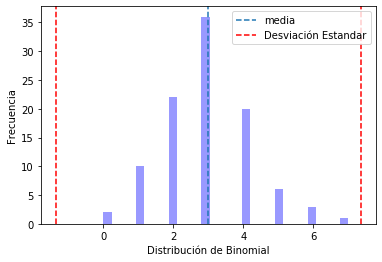

In [101]:
from scipy.stats import binom
p = 0.3
n = 10
data = binom.rvs(p=p, n=n, size=100)

mean, var, skew, kurt =  binom.stats(p=p, n=n, moments='mvsk')

ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribución de Binomial', ylabel='Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'media')
ax.axvline(x = mean +  3 * np.sqrt(var),color='red', linestyle = '--', label = 'Desviación Estandar')
ax.axvline(x = mean - 3 * np.sqrt(var), linestyle = '--', color = 'red')
ax.legend()

## Binomial negativa

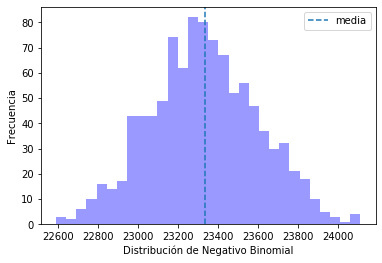

In [116]:
from scipy.stats import nbinom
p = 0.3
n = 10000
data = nbinom.rvs(p=p, n=n, size=1000)

mean, var, skew, kurt =  nbinom.stats(p=p, n=n, moments='mvsk')

ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribución de Negativo Binomial', ylabel='Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'media')
ax.legend()

## Poisson

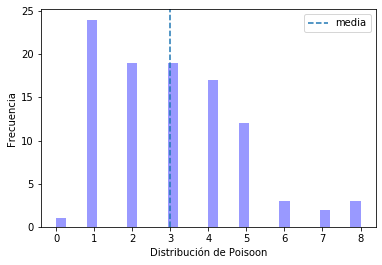

In [117]:
from scipy.stats import poisson
lambda_p = 3

data = poisson.rvs(mu = lambda_p , size=100)

mean, var, skew, kurt =  poisson.stats(mu = lambda_p, moments='mvsk')

ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribución de Poisoon', ylabel='Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'media')
ax.legend()

# Funciones continuas

## Exponencial

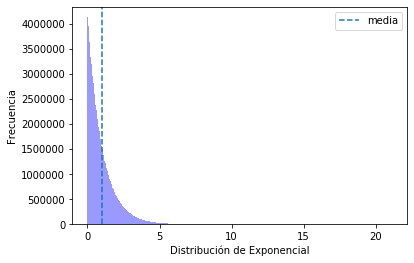

In [119]:
from scipy.stats import expon

data = expon.rvs( size=100000000)

mean, var, skew, kurt =  expon.stats(moments='mvsk')


ax = sns.distplot(data, bins = 500, kde = False, color = 'blue')
ax.set(xlabel = 'Distribución de Exponencial', ylabel='Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'media')
ax.legend()

## Normal

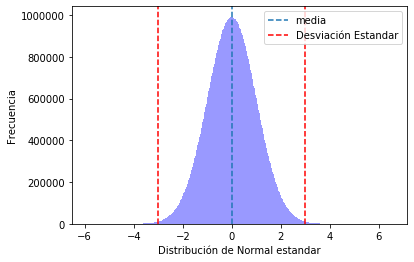

In [121]:
from scipy.stats import norm
mean = 1
var = 0

data = norm.rvs( size=100000000)

mean, var, skew, kurt =  norm.stats(moments='mvsk')


ax = sns.distplot(data, bins = 500, kde = False, color = 'blue')
ax.set(xlabel = 'Distribución de Normal estandar', ylabel='Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'media')
ax.axvline(x = mean +  3 * np.sqrt(var),color='red', linestyle = '--', label = 'Desviación Estandar')
ax.axvline(x = mean - 3 * np.sqrt(var), linestyle = '--', color = 'red')
ax.legend()

## Uniforme

0.5 0.08333333333333333 0.0 -1.2


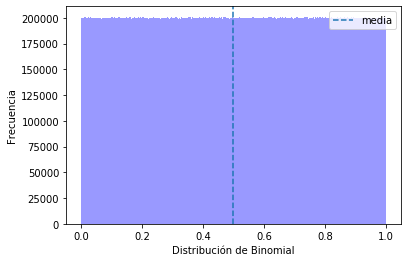

In [124]:
from scipy.stats import uniform


data = uniform.rvs( size=100000000)

mean, var, skew, kurt =  uniform.stats(moments='mvsk')
print(mean, var, skew, kurt )

ax = sns.distplot(data, bins = 500, kde = False, color = 'blue')
ax.set(xlabel = 'Distribución de Binomial', ylabel='Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'media')
# ax.axvline(x = mean +  3 * np.sqrt(var),color='red', linestyle = '--', label = 'Desviación Estandar')
# ax.axvline(x = mean - 3 * np.sqrt(var), linestyle = '--', color = 'red')
ax.legend()

# Correlación, covarianza

In [126]:
df = pd.read_csv('iris-data.csv', index_col = 0)


In [128]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [130]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [131]:
y = df['lar.petalo']
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

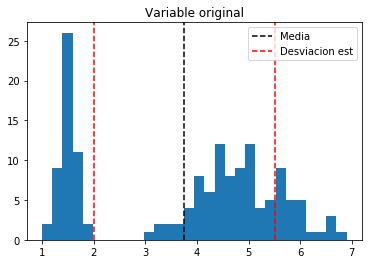

In [136]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins=30)
ax.axvline(x=np.mean(y), c='k', label='Media', linestyle = '--')
ax.axvline(x=np.mean(y) + np.std(y), c='r', label='Desviacion est', linestyle = '--')
ax.axvline(x=np.mean(y) -np.std(y), c='r', linestyle = '--')
ax.legend()

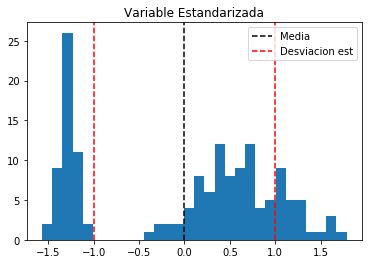

In [143]:
# Estandarizar
fig, ax = plt.subplots()
ax.set_title('Variable original')

y_norm = (y - np.mean(y)) / np.std(y)


ax.hist( y_nomr , bins=30)
ax.set_title('Variable Estandarizada')
ax.axvline(x= np.mean(y_norm), c='k', label='Media', linestyle = '--')
ax.axvline(x= np.mean(y_norm) + np.std(y_norm), c='r', label='Desviacion est', linestyle = '--')
ax.axvline(x= np.mean(y_norm) - np.std(y_norm), c='r', linestyle = '--')
ax.legend()

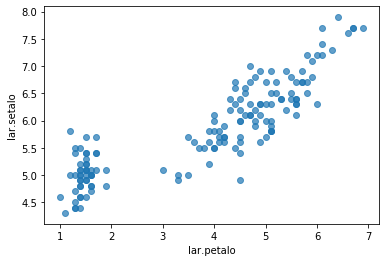

In [146]:
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha = 0.7)
ax.set_xlabel('lar.petalo')
ax.set_ylabel('lar.setalo')
ax.autoscale()

In [147]:
np.cov(df['lar.petalo'], df['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [153]:
corr = df.corr(method = 'kendall')

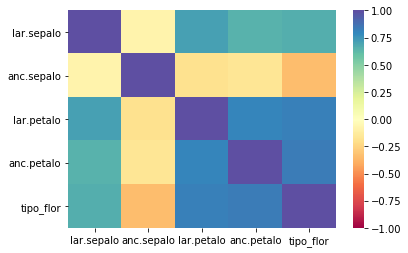

In [157]:
sns.heatmap(corr,
            xticklabels = corr.columns,
           vmin = -1, vmax = 1, cmap = 'Spectral')